In [30]:
#!pip install tensorflow matplotlib
from google.colab import drive
drive.mount('/content/drive')
train_dir = '/content/drive/MyDrive/images/image_dataset/train'
test_dir = '/content/drive/MyDrive/images/image_dataset/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 14 files belonging to 5 classes.
Found 8 files belonging to 5 classes.
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3571 - loss: 1.6350 - val_accuracy: 0.2500 - val_loss: 1.4032
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3571 - loss: 1.2353 - val_accuracy: 0.2500 - val_loss: 1.5010
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - accuracy: 0.7143 - loss: 1.1281 - val_accuracy: 0.5000 - val_loss: 1.1050
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - accuracy: 0.7143 - loss: 0.8789 - val_accuracy: 0.5000 - val_loss: 0.9832
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.5000 - loss: 0.9232 - val_accuracy: 0.6250 - val_loss: 0.8010
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - accuracy: 0.7857 - loss: 0.6659 - val_accuracy: 0.7500 - val_loss: 0.6653
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - accuracy: 0.8571 - loss: 0.5344 - val_accuracy: 0.6250 - val_loss: 0.5458
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/st

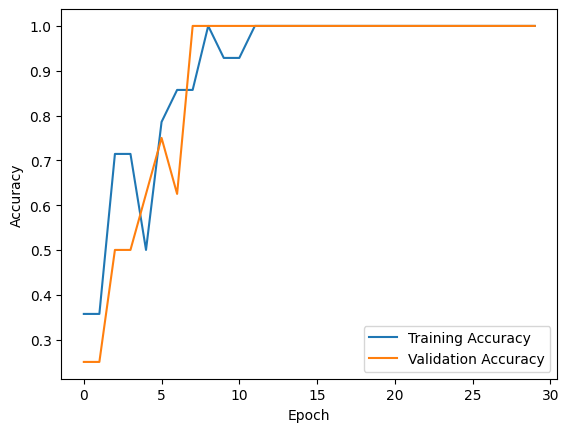

In [31]:

# Install TensorFlow (if needed)
#!pip install tensorflow matplotlib

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Load datasets
batch_size = 32
img_size = (128, 128)  # Resize all images to this size

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int",
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int",
)

# Normalize pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # Classes detected automatically
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=30, validation_data=test_dataset)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted class: [[1.3460020e-03 1.2663193e-04 2.4707433e-06 9.9852496e-01 2.4826741e-15]]


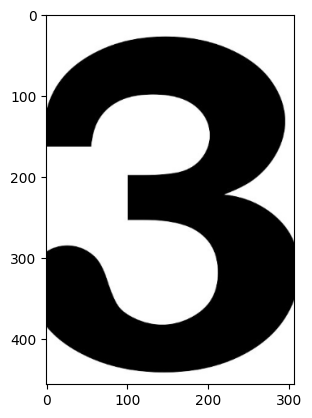

In [34]:
# Test the model on a single image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load a test image from Google Drive
img_path = "/content/drive/MyDrive/images/image_dataset/test/class5/image3.png"  # Update with your image path


img = mpimg.imread(img_path)# show image using two statements
plt.imshow(img)

img = load_img(img_path, target_size=img_size)
img_array = img_to_array(img) / 255.0
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
print(f"Predicted class: {predictions}") # If first value if higher then class Table other wise Chair